In [504]:
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

In [505]:
df = pd.read_csv('Order_History_CSV_200K_rows.csv')

/home/puser/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [506]:
df.head()

,Order Number,Order Status,Order State,Order_Date,Order_Time,Payment_method,Device order placed on,Courier Partner,Courier Area,Member Sign Up Date,customer_id,Company_id,product_id,Brand ID,Event Code,Product Gender,Product Type,Qty Ordered,Qty Canceled Before Payment,Qty Invoiced,QTY Canceled After Payment (Refunded),Qty Outstanding,Qty Shipped,QTY Returned,Qty Refunded,Item Original RSP,Item Cost,Item Cost (Total),Item Selling Price,Item Selling Price (Total),Discount Amount,Order Total inc. Voucher/ Discounts,Voucher Description,Rewardpoints Used,Referred by (UID),Total Number Of Purchases,Magento Order Number,Rs Store Type
0,18022000323229,Awaiting EFT,new,2018-02-20,11:04:55,banktransfer,Desktop,NaN,"""Johanessburg - Gauteng""",2014-10-16,242916.0,24797.0,851877,177.0,"""FTW035""","""LADIES""","""SHOES""",1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,410.0,181.26,181.26,289.0,289.0,0.0,338.0,NaN,NaN,NaN,0,902385,Main
1,18022000352223,Payment Received,processing,2018-02-20,11:04:46,peach_payment,Desktop,NaN,"""Pretoria - Gauteng""",2017-11-30,1111784.0,34521.0,790980,4903.0,"""SEC181""","""MENS""","""TOPS""",1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,260.0,96.90,96.90,149.0,149.0,0.0,1422.0,NaN,NaN,1068987.0,4,902384,Main
2,18022000352223,Payment Received,processing,2018-02-20,11:04:46,peach_payment,Desktop,NaN,"""Pretoria - Gauteng""",2017-11-30,1111784.0,34521.0,618093,4903.0,"""SEC181""","""MENS""","""TOPS""",1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,290.0,96.90,96.90,149.0,149.0,0.0,1422.0,NaN,NaN,1068987.0,4,902384,Main
3,18022000352223,Payment Received,processing,2018-02-20,11:04:46,peach_payment,Desktop,NaN,"""Pretoria - Gauteng""",2017-11-30,1111784.0,34521.0,791030,4903.0,"""SEC181""","""MENS""","""TOPS""",1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,320.0,104.98,104.98,159.0,159.0,0.0,1422.0,NaN,NaN,1068987.0,4,902384,Main
4,18022000352223,Payment Received,processing,2018-02-20,11:04:46,peach_payment,Desktop,NaN,"""Pretoria - Gauteng""",2017-11-30,1111784.0,34521.0,790926,4903.0,"""SEC181""","""MENS""","""TOPS""",1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,260.0,96.90,96.90,149.0,149.0,0.0,1422.0,NaN,NaN,1068987.0,4,902384,Main


It seems like dataset was created by joining two tables in database: orders and ordered_items. Lets compress information to contain orders only.

In [507]:
orders = df.groupby(['Order Number', 'Order State', 'Order_Date', 'Order_Time', 'Payment_method', 'Device order placed on', 'Total Number Of Purchases', 'Member Sign Up Date'], as_index=False).agg({'Qty Ordered': np.sum, 'customer_id': np.mean, 'Order Total inc. Voucher/ Discounts': np.mean})
orders.head()

,Order Number,Order State,Order_Date,Order_Time,Payment_method,Device order placed on,Total Number Of Purchases,Member Sign Up Date,Qty Ordered,customer_id,Order Total inc. Voucher/ Discounts
0,17030300018331,canceled,2017-11-24,01:40:37,banktransfer,Mobile,0,2016-06-05,1.0,587691.0,1218.0
1,17072800155684,complete,2017-11-19,12:09:58,peach_payment,Desktop,32,2015-06-08,2.0,332486.0,547.0
2,17073000090255,complete,2017-11-24,12:02:40,peach_payment,Mobile,15,2013-10-15,2.0,151701.0,497.0
3,17082300964731,complete,2017-12-06,11:31:51,peach_payment,Mobile,52,2013-11-05,1.0,159718.0,548.0
4,17082400615805,complete,2017-11-15,09:13:53,peach_payment,Desktop,10,2015-05-22,3.0,318542.0,336.0


In [508]:
orders.shape

(78520, 11)

Lets split dates and times into days, months, days of week and hours.

In [509]:
orders['order_day'] = orders.apply(lambda row: int(row['Order_Date'].split('-')[2]), axis=1)
orders['order_month'] = orders.apply(lambda row: int(row['Order_Date'].split('-')[1]), axis=1)
orders['order_hour'] = orders.apply(lambda row: int(row['Order_Time'].split(':')[0]), axis=1)
orders['order_dow'] = pd.to_datetime(orders['Order_Date']).apply(lambda item: item.weekday())
orders['days_since_reg'] = (pd.to_datetime(orders['Order_Date']) - pd.to_datetime(orders['Member Sign Up Date'])).dt.days

orders.drop(['Order_Date', 'Order_Time'], inplace=True, axis=1)

orders.head()

,Order Number,Order State,Payment_method,Device order placed on,Total Number Of Purchases,Member Sign Up Date,Qty Ordered,customer_id,Order Total inc. Voucher/ Discounts,order_day,order_month,order_hour,order_dow,days_since_reg
0,17030300018331,canceled,banktransfer,Mobile,0,2016-06-05,1.0,587691.0,1218.0,24,11,1,4,537
1,17072800155684,complete,peach_payment,Desktop,32,2015-06-08,2.0,332486.0,547.0,19,11,12,6,895
2,17073000090255,complete,peach_payment,Mobile,15,2013-10-15,2.0,151701.0,497.0,24,11,12,4,1501
3,17082300964731,complete,peach_payment,Mobile,52,2013-11-05,1.0,159718.0,548.0,6,12,11,2,1492
4,17082400615805,complete,peach_payment,Desktop,10,2015-05-22,3.0,318542.0,336.0,15,11,9,2,908


Lets find distribution of orders by months, days, days of week and hours

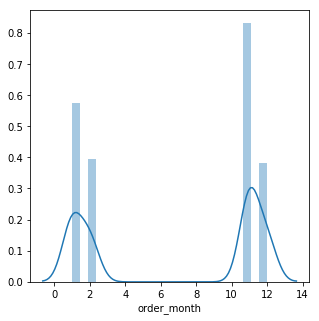

In [510]:
sb.distplot(orders['order_month'])

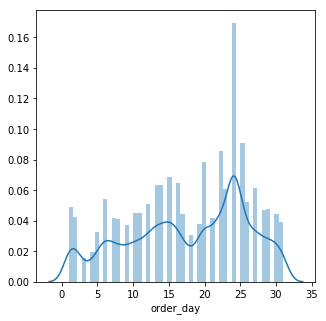

In [511]:
sb.distplot(orders['order_day'])

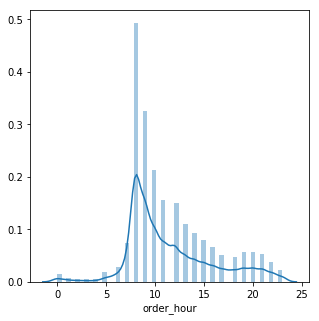

In [512]:
sb.distplot(orders['order_hour'])

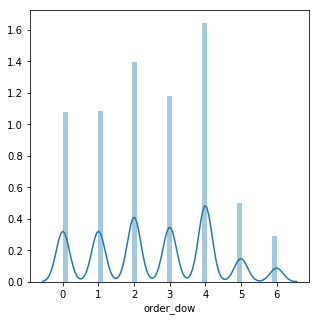

In [513]:
sb.distplot(orders['order_dow'])

Few ideas from these charts:
* Data set contains information about last several months only: November, December, January and February. We should remember about it because results of research will be biased due to obvious linkage to specific season.
* 24th day in month contains big peak of ordering. We will check this later.
* Big number of orders are created during period from 8 to 10 hours.
* Most of orders are done during working days (Mo-Fri). Weekend orders are ~2-3 times smaller.

Lets research order statuses

In [514]:
vc = orders['Order State'].value_counts().reset_index()
vc.columns = ['title', 'count']
vc

,title,count
0,complete,58916
1,canceled,10621
2,processing,7397
3,closed,1444
4,new,142


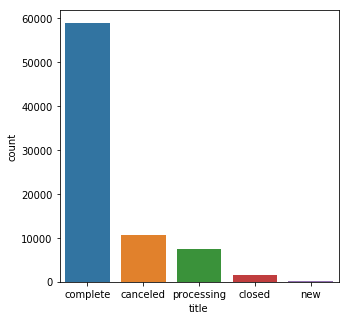

In [515]:
sb.barplot(x='title', y='count', data=vc)

In [516]:
10621.0/orders.shape[0]

0.13526490066225166

So 14% of orders are cancelled. It will be good to check reasons of cancelling. It is good candidate for optimisation.

Lets check payment methods and usage methods

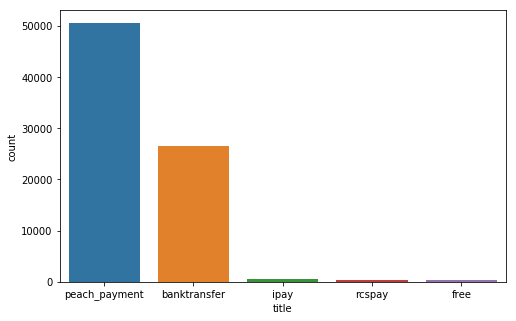

In [517]:
vc = orders['Payment_method'].value_counts().reset_index()
vc.columns = ['title', 'count']
plt.rcParams['figure.figsize'] = (8,5)
sb.barplot(x='title', y='count', data=vc)

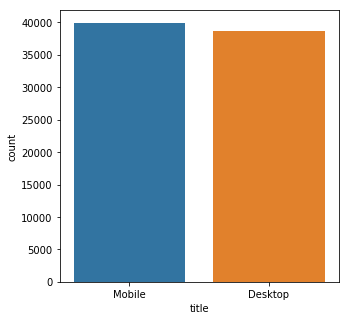

In [518]:
vc = orders['Device order placed on'].value_counts().reset_index()
vc.columns = ['title', 'count']
plt.rcParams['figure.figsize'] = (5,5)
sb.barplot(x='title', y='count', data=vc)

In [519]:
devices = orders[['Order Total inc. Voucher/ Discounts', 'Device order placed on', 'Qty Ordered']]
devices.columns = ['price', 'device', 'qty']
devices = devices.groupby(['device']).agg({'price': np.sum, 'qty': np.max}).reset_index()
devices

,device,price,qty
0,Desktop,29044627.27,119.0
1,Mobile,31394904.39,93.0


Few conclusions from this part:
* There is no visible differences between ways application is used on mobile and on desktop
* 2/3 of payment usages is PeachPayments and 1/3 bank transfer. Other payment methods are available but not used.

Lets check number of purchases for specific customers

In [520]:
purchases = orders[['Total Number Of Purchases', 'customer_id']]
purchases.columns = ['count', 'customer']
purchases = purchases.groupby(['customer']).agg({'count': np.sum}).reset_index()
purchases.shape[0]

37524

In [521]:
purchases = purchases[purchases['count'] > 0]
purchases.shape[0]

35096

In [522]:
purchases = purchases[purchases['count'] > 10]
purchases.shape[0]

12630

In [523]:
purchases = purchases[purchases['count'] > 30]
purchases.shape[0]

5829

In [524]:
purchases = purchases[purchases['count'] > 100]
purchases.shape[0]

1828

In [525]:
purchases = purchases[purchases['count'] > 1000]
purchases.shape[0]

73

Few statistics about user activities:
* 37524 users registered in application
* 35096 users bought something at least once
* 12630 users bought more then 10 items
* 5829 users bought more then 30 items
* 1828 users bought more then 100 items
* 73 users bought more then 1000 items

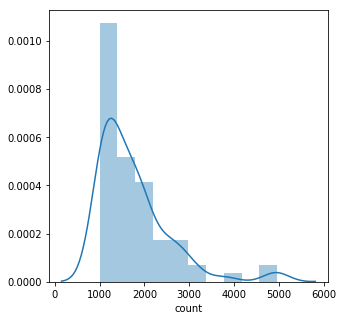

In [526]:
sb.distplot(purchases['count'])

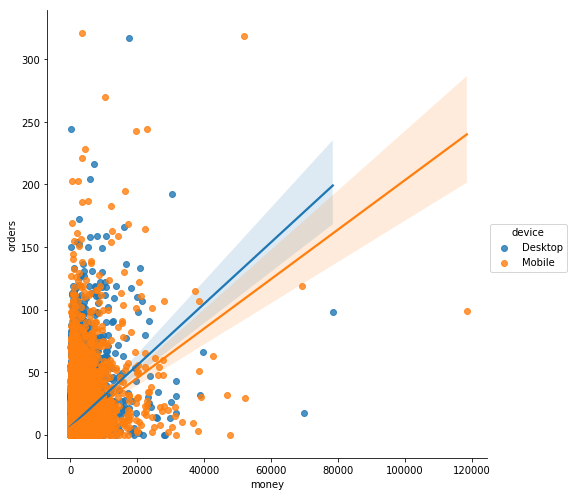

In [527]:
customers = orders[['Order Total inc. Voucher/ Discounts', 'Total Number Of Purchases', 'customer_id', 'Device order placed on']]
customers.columns = ['money', 'orders', 'customer', 'device']
customers = customers.groupby(['customer', 'device']).agg({'money': np.sum, 'orders': np.max}).reset_index()

sb.lmplot(x="money", y="orders", hue="device", truncate=True, size=7, data=customers)

No difference between mobile and desktop versions. They are just same.

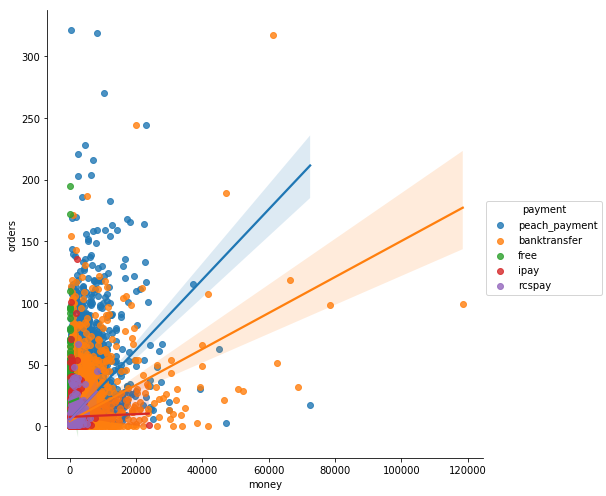

In [528]:
customers = orders[['Order Total inc. Voucher/ Discounts', 'Total Number Of Purchases', 'customer_id', 'Payment_method']]
customers.columns = ['money', 'orders', 'customer', 'payment']
customers = customers.groupby(['customer', 'payment']).agg({'money': np.sum, 'orders': np.max}).reset_index()

sb.lmplot(x="money", y="orders", hue="payment", truncate=True, size=7, data=customers)

There is visible difference between PeachPayment and bank transfers. Peach payments are much more often used for small and cheap purchases. Big and expensive things are usually bought using bank transfers.

Lets return to peak of purchases on 24th day of month and investigate it more detaily.

In [529]:
twentyfourth = orders[orders['order_day'] == 24]
twentyfourth.shape[0]

7978

Since there is strong relation of peak with date then lets check other date&time parameters of this sub-dataset.

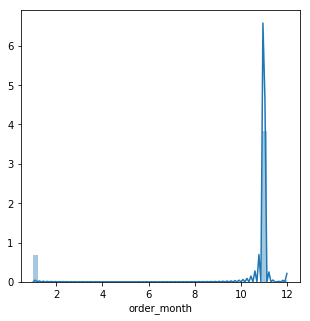

In [530]:
sb.distplot(twentyfourth['order_month'])

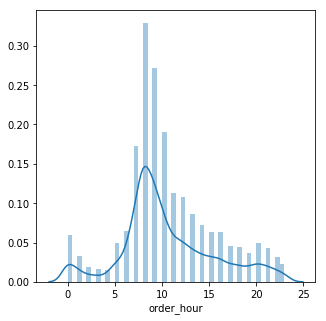

In [531]:
sb.distplot(twentyfourth['order_hour'])

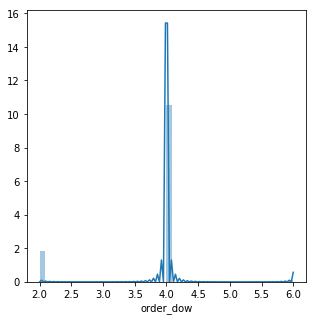

In [532]:
sb.distplot(twentyfourth['order_dow'])

So key date is 24th of November 2017. All purchases happened during this day. Lets check other parameters of this ordering peak.

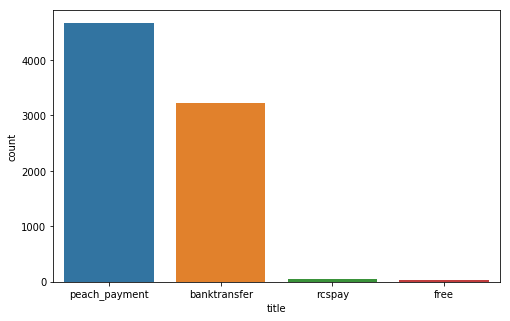

In [533]:
vc = twentyfourth['Payment_method'].value_counts().reset_index()
vc.columns = ['title', 'count']
plt.rcParams['figure.figsize'] = (8,5)
sb.barplot(x='title', y='count', data=vc)

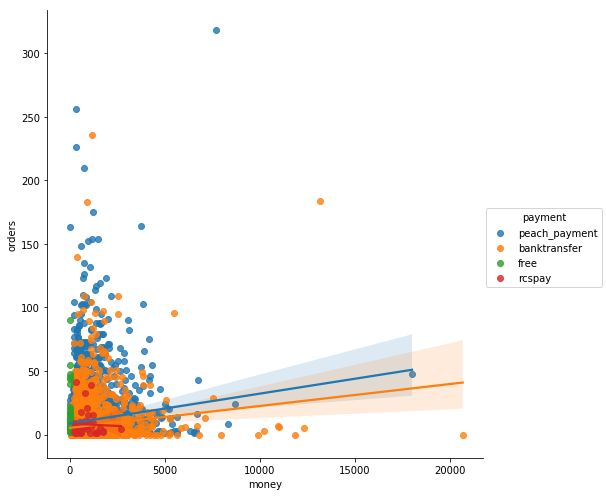

In [534]:
customers = twentyfourth[['Order Total inc. Voucher/ Discounts', 'Total Number Of Purchases', 'customer_id', 'Payment_method']]
customers.columns = ['money', 'orders', 'customer', 'payment']
customers = customers.groupby(['customer', 'payment']).agg({'money': np.sum, 'orders': np.max}).reset_index()

sb.lmplot(x="money", y="orders", hue="payment", truncate=True, size=7, data=customers)

Conclusions about 24th of November anomaly:
* There was 2x times bigger number of orders at 24th of November 2017. Aproximatelly 8000 orders were made during this day.
* Despite traditional preference of peach payment by application users during this day both PP and bank transfers were used in same way.
* Probably this anomaly was related to some big adverisement company. Maybe big discount was provided to all users.

Lets check cancelation cases.

In [535]:
cancelled = orders[orders['Order State'] == 'canceled']
cancelled.shape[0]

10621

Lets check date&time parameters of cancellations

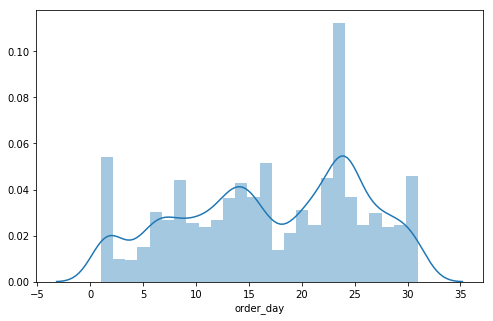

In [536]:
sb.distplot(cancelled['order_day'])

Lets check if cancellations are somehow related to payment types.

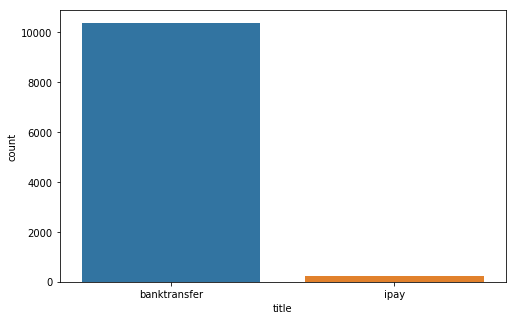

In [537]:
vc = cancelled['Payment_method'].value_counts().reset_index()
vc.columns = ['title', 'count']
plt.rcParams['figure.figsize'] = (8,5)
sb.barplot(x='title', y='count', data=vc)

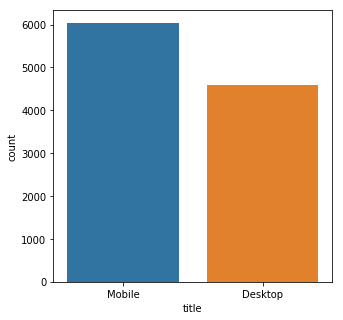

In [538]:
vc = cancelled['Device order placed on'].value_counts().reset_index()
vc.columns = ['title', 'count']
plt.rcParams['figure.figsize'] = (5,5)
sb.barplot(x='title', y='count', data=vc)

Conclutions about cancellations:
* 14% of purchases are cancelled
* Number of cancellation are correlated to number of new orders. The only exception is peak at end of month and at begin on months (30-2)
* Cancellations are strictly related to bank transfers
* Orders created using desktop have little bit smaller chances for cancellation